Homework 1 — (15 points)
======
### What to hand in
1. A Jupyter notebook containing all code and output (figures and audio). I should be able to evaluate the file to reproduce all output. 
1. Any other data that we tell you to save to a file (e.g. audio files).

### How to hand it in
1. Compress all of the files specified into a .zip file. 
1. Name the file in the following manner, firstname_lastname_hw1.zip. For example, Bryan_Pardo_hw1.zip. 
1. Submit this .zip file via Canvas

## Run this code block 1st, to import likely needed packages

In [2]:
# This line imports most packages you'll need. You may need to import others (eg random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math
from IPython.display import Audio
from scipy.fftpack import fft, ifft

# This line makes sure your plots happen IN the webpage you're building, instead of in separate windows.
%matplotlib inline

/Users/shannonnachreiner/miniconda2/envs/eecs352/lib/python2.7/site-packages/librosa/core/audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


## Questions

#### 1. (one point) Go out on the web and read about the early history of audio recording. Thomas Edison, Alexandar Graham Bell,  Édouard-Léon Scott de Martinville and Valdemar Poulsen are all big names in the history of audio recording. Give one paragraph on what each of these people contributed to audio recording.

Thomas Edison invented the phonograph in 1877. While trying to figure out how to record telephone messages using paper strips, he had an idea to put the paper strips on a roll and mount a needle attached to a diaphragm above it. When you passed sound in, the diaphragm would move, and the needle would makes squiggles in the paper strips according to the diaphragm's movement. You could play the sound back by turning a crank and rolling the paper back through with the needle resting in the grooves, which would move the diaphragm in the exact way necessary to reproduce the sound. He eventually replaced the paper strips with tinfoil. 

Alexander Graham Bell refined Edison's phonograph in his Volta Laboratory and patented the Graphophone in 1886. The Graphophone worked using the same mechanism of the phonograph, but instead of making grooves in tinfoil wrapped around a cylinder, the needle made engravings on a cardboard tube coated in wax that could be reused. Edison was inspired by this and made the cylinders of his Perfected Phonograph all-wax, getting rid of the cardboard part. 

Eduoard-Leon Scott de Martinville invented the phonautograph, the first sound recording device, in 1857, 20 years before Edison's phonograph. The phonautograph was able to record sound but not able to play it back. It recorded much in the same manner that the phonograph recorded: sound moved down a horn and moved a diaphragm, which was attached to a bristle. The diaphragm's movements caused the bristle to transcribe the sound into a visual image on paper covered in soot, or lamp black. He sold phonautographs to laboratories that were investigating things like vowel sounds and sound waves.

Valdemar Poulsen invented the first magnetic wire recorder in 1899 called the telegraphone. It involved thin steel wire called "piano-wire" wrapped around cylinders that could be moved via a hand crank past a recording head which is simultaneously being fed an electric signal (the sound), thus magnetizing the wire with a certain pattern. The playback head picked up the magnetic field patterns on the wire and converted them back into signals. 

#### 2. (one point)  The sample rate of telephone audio (8 kHz) and CD quality audio (44.1 kHz) are very different. Explain what effect this difference in sample rate has on the ability of a recorder to reproduce sound and why the sample rate of CD audio is what it is. 

The sample rate determines how often you are taking digital samples of an audio recording. The more samples you take, the more data points you have to work with when trying to reconstruct the original signal from your samples. It is easier to make better reconstructions when you have a lot of data points because it makes for more accurate interpolations. You have a better idea of what is happening in the audio between two data points if you have five data points between them -- that is what a higher sampling rate is accomplishing for you. The recorder with a lower sampling frequency will have an inferior reproduction because it has more limited interpolative capacity and, therefore, poorer reconstruction of the original signal than a recorder with a higher sampling frequency.

The sample rate of CD audio is what it is for 2 reasons. The first reason is that the highest frequency humans can hear is 20kHz and the Nyquist-Shannon sampling theorem says that the sampling frequency must be more than twice as much as the maximum frequency that you want to reproduce. So the CD makers needed to choose a sampling frequency above 40kHz. Moreover, they needed a practical anti-aliasing filter in the form of a relatively wide transition band, which explains the extra 4kHz. The second reason is that early digital recording has to be done on video recorders because storing the necessary bandwidth per channel was difficult. VCRs were the only things that could store substantial durations of audio. The recordings were done in two different frequency standards, and the frequency that ended up being a common multiple of the two standards that also required no more than 3 samples per video line was 44.1kHz. 

#### Sample rate isn't the only difference between CD and telephone audio. Express in dB the difference in dynamic range between 8 bit audio (telephone quality) and 16 bit audio (CD quality).  How many bits would one need to exceed the dynamic range of human hearing? Show you work.

8 bit audio has 256 (2^8) levels of quantization, whereas 16 bit audio has 65,536 (2^16) levels of quantization. You can calculate the signal-to-noise ratio, aka dynamic range, using the formula 20*(log(base 10) of the ratio of the highest value to the lowest value)).

The highest value would be the maximum integer that could be represented in that number of bits, aka 2^(bit-depth). 0 is undetectable so it's not the lowest. Instead, the lowest is 1. 

Also, the dynamic range of human hearing is 120dB. We need to invert the formula to get the bit depth from a dynamic range. Range/20 = log(2^bit_depth) so 10^(range/20) = 2^bit_depth so log2(10^(range/20)) = bit_depth.

In [3]:
# your code to give the answer goes here
def calc_dynamic_range(bit_depth):
    return 20 * np.log10(2**bit_depth)

def calc_bit_depth(dynamic_range):
    return np.log2(10**(dynamic_range/20))

eightBitRange = calc_dynamic_range(8)
sixteenBitRange = calc_dynamic_range(16)
hhBitDepth = calc_bit_depth(120)
print "The dynamic range of 8 bit audio is " + str(eightBitRange) + " dB"
print "The dynamic range of 16 bit audio is " + str(sixteenBitRange) + " dB"
print "Therefore, the difference between the dynamic ranges of the two is " + str(sixteenBitRange - eightBitRange) + " dB"

print "\nTo exceed the range of human hearing, one would need at least " + str(hhBitDepth) + " bits"
print "Better yet, just go for " + str(np.ceil(hhBitDepth)) + " bits"




The dynamic range of 8 bit audio is 48.1647993062 dB
The dynamic range of 16 bit audio is 96.3295986125 dB
Therefore, the difference between the dynamic ranges of the two is 48.1647993062 dB

To exceed the range of human hearing, one would need at least 19.9315685693 bits
Better yet, just go for 20.0 bits


#### 3. (one point) Make a function to generate sinewaves and a function  to plot an audio signal. Label the figure's axes appropriately.

In [4]:
# sinewave.py
def make_sinewave(f, t, sr):
    """    
    Parameters
    ----------
    f:  float
        Frequency of sine wave
    t:  float
        Duration in seconds
    sr: int
        Sample rate
    
    Returns
    -------
    np.ndarray 
        Array of floats containing the signal
    """
    
    times = np.arange(0,t*sr)/sr
    x = np.sin(2*np.pi*f*times)
    
    return x

def plot_audio(x, sr, figsize=(16,4)):
    """
    A simple audio plotting function
    
    Parameters
    ----------
    x: np.ndarray
        Audio signal to plot
    sr: int
        Sample rate
    figsize: tuple
        A duple representing the figure size (xdim,ydim)
    """
    
    length = float(x.shape[0]) / sr
    t = np.linspace(0,length,x.shape[0])
    plt.figure(figsize=figsize)
    plt.plot(t, x)
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.show()
   
# example for my sake
meow = make_sinewave(220., 3., 44100.)
plot_audio(meow[:1000], 44100.)
Audio(meow, rate=44100)

#### 4. (one point) What 3 pitch classes are in a C major triad? Make a C major triad out of sine waves that is in the same octave as A440 (i.e. starting on the C above A440). Display the waveform and play it.

The three pitch classes in a C major triad are C, E, and G.

In [5]:
# Make, plot and play the C major triad here.

c = make_sinewave(523.25, 3., 44100)
e = make_sinewave(659.25, 3., 44100)
g = make_sinewave(783.99, 3., 44100)

combo = c + e + g

plot_audio(combo[:1000], 44100)
Audio(combo, rate=44100)

#### 5. (one point) Implement a simple function to express the Root Mean Squared Amplitude of a signal encoded as an array, in dB, with respect to a reference value.

In [6]:
def rms_db(signal, reference):
    '''
    Parameters
    ----------
    signal:  np.ndarray 
        Array of floats containing the signal
    reference:  float
        A reference amplitude to compare to 

    Returns
    -------
    float
        a value in dB, given the reference value
    '''
    
    dur = signal.size
    rms = 0
    result = 0
    
    for amp in signal:
        rms += amp**2
    
    rms = rms/dur
    rms = np.sqrt(rms)
    
    result = 20*np.log10(rms/reference)
    return result


    

#### 6. (one point) Make a signal.  Vary its volume and find out for yourself how many dB different sounds have to be, before you can tell the volume is different?  Play identical pairs, where the only difference between them is the amplitude. Start with 0 db difference, and grow the difference until you can reliably tell them apart.   Oh...and do this in a quiet room with headphones on. This won't work at all on your laptop speakers or in a loud room.

It's about 1.52 dB where I start to notice a difference in volume. 

In [19]:
#write your code to make repeated pairs of audio that vary by differing dB amounts here.

def makePair(f, t, diff):
    x = make_sinewave(f, t, 44100.)
    x[44100:] = 0
    y = diff * make_sinewave(f, t, 44100.)
    y[:88199] = 0
    x = x + y
    
    return x

x = 1.122 * make_sinewave(220., 3., 44100)
print "1.122 coefficient makes the volume louder by " + str(rms_db(x, .7071)) + " dB"
pair1 = makePair(220., 3., 1.122)
IPython.display.display(Audio(pair1, rate=44100))

x = 1.19 * make_sinewave(220., 3., 44100)
print "1.19 coefficient makes the volume louder by " + str(rms_db(x, .7071)) + " dB"
pair2 = makePair(220., 3., 1.19)
IPython.display.display(Audio(pair2, rate=44100))

x = 1.192 * make_sinewave(220., 3., 44100)
print "1.192 coefficient makes the volume louder by " + str(rms_db(x, .7071)) + " dB"
pair2 = makePair(220., 3., 1.192)
IPython.display.display(Audio(pair2, rate=44100))

x = 1.193 * make_sinewave(220., 3., 44100)
print "1.193 coefficient makes the volume louder by " + str(rms_db(x, .7071)) + " dB"
pair3 = makePair(220., 3., 1.193)
IPython.display.display(Audio(pair3, rate=44100))

x = 1.23 * make_sinewave(220., 3., 44100)
print "1.23 coefficient makes the volume louder by " + str(rms_db(x, .7071)) + " dB"
pair3 = makePair(220., 3., 1.23)
IPython.display.display(Audio(pair3, rate=44100))

x = 1.28 * make_sinewave(220., 3., 44100)
print "1.28 coefficient makes the volume louder by " + str(rms_db(x, .7071)) + " dB"
pair3 = makePair(220., 3., 1.28)
IPython.display.display(Audio(pair3, rate=44100))


1.122 coefficient makes the volume louder by 0.999940436883 dB


1.19 coefficient makes the volume louder by 1.51102252633 dB


1.192 coefficient makes the volume louder by 1.52560840656 dB


1.193 coefficient makes the volume louder by 1.53289217189 dB


1.23 coefficient makes the volume louder by 1.79818552727 dB


1.28 coefficient makes the volume louder by 2.14428269144 dB


#### 7. (one point) Implement a Fourier transform function and an inverse Fourier transform function using the formulae from the course lecture notes.

In [8]:
def fourier_transform(x):
    """ 
    Performs a Fourier transform
    
    Parameters
    ----------
    x: np.ndarray 
        Array of real or complex values containing the signal
    
    Returns
    -------
    np.ndarray 
        Array of complex vaules containing the signal
    """

    numSamples = x.size
    sigma = 0
    result = list()
    
    for k in range(numSamples):
        sigma = 0
        for n in range(numSamples):
            amp = x[n]
            exponent = (-2j)*np.pi*k*n/numSamples
            sigma += amp*np.exp(exponent)
        result.append(sigma)
            
    result = np.array(result)
    return result

In [9]:
def inverse_fourier_transform(X):
    """ 
    Performs an inverse Fourier transform
    
    Parameters
    ----------
    x: np.ndarray 
        Array of  complex values containing the signal
    
    Return
    ------
    np.ndarray 
        Array of complex vaules containing the signal
    """
    
    numSamples = X.size
    sigma = 0
    result = list()
    
    for n in range(numSamples):
        sigma = 0
        for k in range (numSamples):
            amp = X[k]
            exponent = 2j*np.pi*k*n/numSamples
            sigma += amp * np.exp(exponent)
        result.append(sigma/numSamples)
    
    result = np.array(result)
    return result
    

#### 8. (one point) Write code to test that these functions work properly. Be sure to explain why you think your test is a good one.

For my first test, I wanted to test my fourier_transform(x) and inverse_fourier_transform(X) functions on a simple sinewave. I plotted a) the original signal, b) a frequency-amplitude plot of the fourier transformation of the signal, and c) the reconstruction of the fourier-transformed signal using my inverse_fourier_transform(X) function. Plot b) shows an energy pattern that I would expect for a sine wave, being a gigantic spike in amplitude at the frequency of the pure tone. Plot c) shows that the inverse fourier transformation function is successfully performing the inverse operation on the fourier transformation function since the plot appears identical to the original signal in plot a). Therefore, both fourier_transform(x) and inverse_fourier_transform(X) are working. 

For my second test, I wanted to see what the two functions would do for a slightly more complex signal, one that combines sinewaves of two different frequencies. If the functions were robust, they would be able to handle it. I saw the same results as for my first test, so the functions are doing a good job.

For my last test, I wanted to throw an even more complex signal with modulated amplitude at my functions to see just how robust they were. They handled this signal no problem. I compared the output of my FT with FFT and the values in the arrays were identical. I also compared the audio plot of my IFT to the results generated from IFFT and saw that they were identical, which was a ringing endorsement for its correctness. 

a) This plot shows the original signal of a pure tone


b) This plot shows the inverse Fourier transform of the Fourier transformation of the original signal


c) This plot shows the frequency spectrum of the Fourier transform
d) This plot shows a slightly more complex signal which combines 2 sinewaves


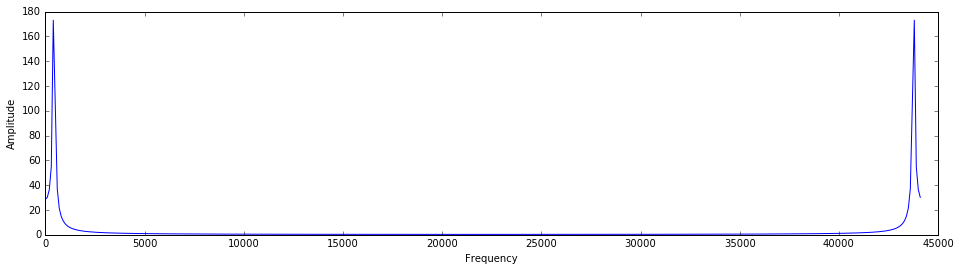

e) This plot shows the inverse Fourier transform of the Fourier transformation of the original signal


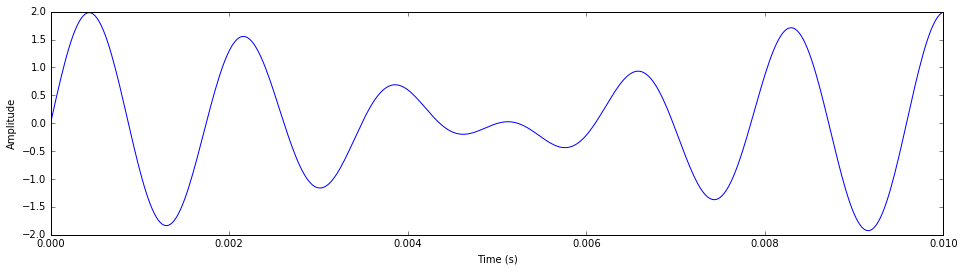

f) This plot shows an even more complex signal


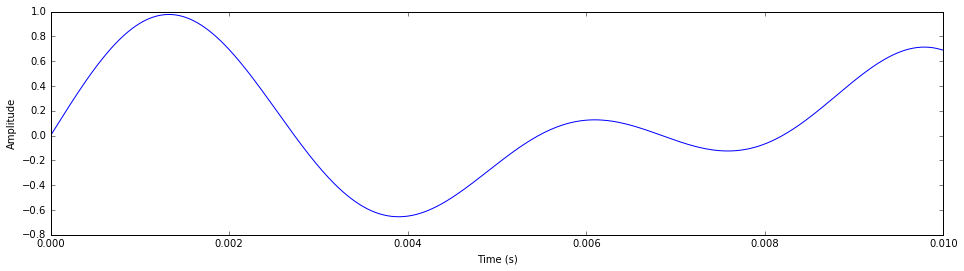

g) This plot shows my inverse Fourier transform of my Fourier transformation of the signal


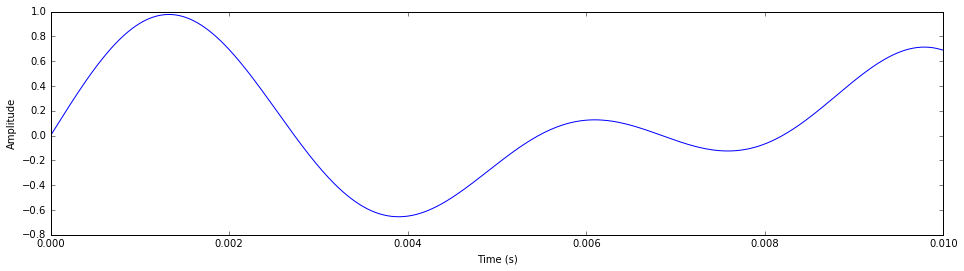

h) This plot shows the IFFT calculated inverse transform of my Fourier transform of the signal


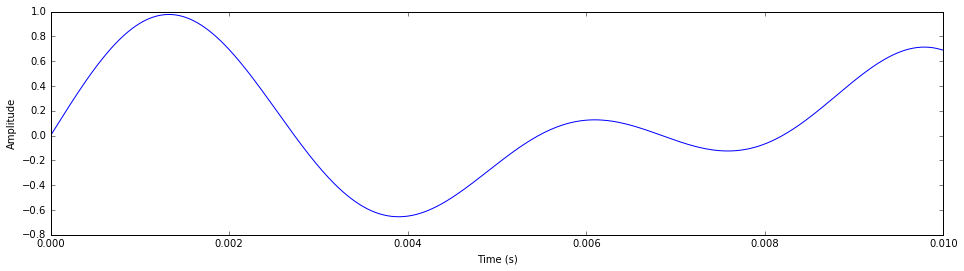

The first 20 values in my Fourier transform are 
[  61.77402855 +0.j          109.74750522-12.67559197j
   10.21560626-72.84264466j  -27.54810148+33.14296317j
  -12.59383735+16.81240638j   -7.56650264+11.72610288j
   -5.15881252 +9.13848677j   -3.79896941 +7.53838268j
   -2.95002621 +6.43839336j   -2.38244197 +5.63014151j
   -1.98339556 +5.00841362j   -1.69177725 +4.51386576j
   -1.47200634 +4.11026835j   -1.30216870 +3.77414796j
   -1.16814443 +3.48957478j   -1.06049157 +3.24532944j
   -0.97269655 +3.03326596j   -0.90014518 +2.8473176j
   -0.83949310 +2.6828677j    -0.78826739 +2.5363374j ]
The first 20 values in the FFT are 
[  61.77402855 +0.j          109.74750522-12.67559197j
   10.21560626-72.84264466j  -27.54810148+33.14296317j
  -12.59383735+16.81240638j   -7.56650264+11.72610288j
   -5.15881252 +9.13848677j   -3.79896941 +7.53838268j
   -2.95002621 +6.43839336j   -2.38244197 +5.63014151j
   -1.98339556 +5.00841362j   -1.69177725 +4.51386576j
   -1.47200634 +4.11026835j   -1.30

In [69]:
# Write your code to check here. 
#  Be sure to explain in your comments how this test confirms the correctness.
# NOTE: 2 things *I* would test are (1) if I take the Fourier transform of a signal, 
# and then take its output as the input to the inverse Fourier transform, does the 
# result look like the original signal?  and (2) If I look at the result of the 
# Fourier transform, do I see a pattern of energy that I would expect to see, given
# what the input signal contains?

def plot_spectrum(x, sr, figsize=(16,4)):
    f_analysis = sr/x.size
    max = f_analysis * x.size
    f = np.linspace(0, max, x.size)
    plt.figure(figsize=figsize)
    plt.plot(f, np.abs(fourier_transform(x)))
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')


# pure tone
x = make_sinewave(440., 0.01, 44100)
print "a) This plot shows the original signal of a pure tone"
plot_audio(x, 44100)
y = fourier_transform(x)
z = inverse_fourier_transform(y)
print "b) This plot shows the inverse Fourier transform of the Fourier transformation of the original signal"
plot_audio(z, 44100)
print "c) This plot shows the frequency spectrum of the Fourier transform"
plot_spectrum(x, 44100)

# slightly more complex sinewave
x = make_sinewave(525., 0.01, 44100) + make_sinewave(625., 0.01, 44100)
print "d) This plot shows a slightly more complex signal which combines 2 sinewaves"
plot_audio(x, 44100)
y = fourier_transform(x)
z = inverse_fourier_transform(y)
print "e) This plot shows the inverse Fourier transform of the Fourier transformation of the original signal"
plot_audio(z, 44100)

#even more complex signal
freq = 220.
x = make_sinewave(freq, 0.01, 44100)
freq2 = freq * 2**(-7/12.)
x2 = make_sinewave(freq2, 0.01, 44100)
x3 = x + x2
mod_freq = 3
mod_sig = (make_sinewave(mod_freq, 0.01, 44100) + 1.0) * 0.5
x4 = x3 * mod_sig
print "f) This plot shows an even more complex signal"
plot_audio(x4, 44100)
y = fourier_transform(x4)
z = inverse_fourier_transform(y)
print "g) This plot shows my inverse Fourier transform of my Fourier transformation of the signal"
plot_audio(z, 44100)
z_fft = ifft(y)
print "h) This plot shows the IFFT calculated inverse transform of my Fourier transform of the signal"
plot_audio(z_fft, 44100)

print "The first 20 values in my Fourier transform are "
print y[:20]
y_fft = fft(x4)
print "The first 20 values in the FFT are "
print y_fft[:20]



From this point on, you will use the fft and ifft functions from scipy, as they are much faster than the code you just wrote. See the following link for documentation on them. 
http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html


Hint: https://docs.python.org/2/library/timeit.html and https://docs.python.org/2/library/time.html  are useful for the following problem.
            

#### 9. (one point) What is the computational complexity of the Fourier Transform  code you built? What is the computational complexity of the Fast Fourier Transform (FFT)? Illustrate the difference in running time by measuring how long it takes your fourier_transform code on signals of different length and plot the time to completion (vertical axis) as a function of the number of samples (horizontal axis). Compare that on the same graph to how long it took on the same number of samples with the python FFT. Do these time numbers back up the computational complexity?

The computational complexity of the Fourier Transform code I just built is O(n^2) whereas the computational complexity of the FFT is O(nlogn). I couldn't do many higher numbers because unfortunately my computer was getting overheated... But alas you can see quite clearly in my graph that the FFT is much faster than my FT function. My FT function gets overwhelmingly slow quickly, whereas the FFT is slowly, slowly growing, as you'd expect from an nlogn. 

[0.005198955535888672, 0.07230210304260254, 4.665593862533569]
[0.0035181045532226562, 0.0028638839721679688, 0.0029449462890625]


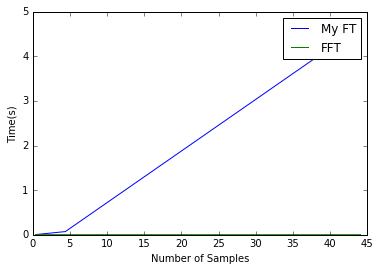

In [20]:
# Write your code to test the timing of the two approaches here.
import timeit

t_my_ft = list()
sr = 44100
num_samples = [0.00001 * sr, 0.0001 * sr, 0.001 * sr]

t_my_ft.append(timeit.timeit(stmt='y = fourier_transform(x)', setup='from __main__ import fourier_transform, make_sinewave; x = make_sinewave(440., 0.00001, 44100)', number=1000))

t_my_ft.append(timeit.timeit(stmt='y = fourier_transform(x)', setup='from __main__ import fourier_transform, make_sinewave; x = make_sinewave(440., 0.0001, 44100)', number=1000))

t_my_ft.append(timeit.timeit(stmt='y = fourier_transform(x)', setup='from __main__ import fourier_transform, make_sinewave; x = make_sinewave(440., 0.001, 44100)', number=1000))



print t_my_ft
t_my_ft = np.array(t_my_ft)

t_fft = list()

t_fft.append(timeit.timeit(stmt='y = fft(x)', setup='from __main__ import fft, make_sinewave; x = make_sinewave(440., 0.00001, 44100)', number=1000))

t_fft.append(timeit.timeit(stmt='y = fft(x)', setup='from __main__ import fft, make_sinewave; x = make_sinewave(440., 0.0001, 44100)', number=1000))

t_fft.append(timeit.timeit(stmt='y = fft(x)', setup='from __main__ import fft, make_sinewave; x = make_sinewave(440., 0.001, 44100)', number=1000))

print t_fft
t_fft = np.array(t_fft)

line_up, = plt.plot(num_samples, t_my_ft, label='My FT')
line_down, = plt.plot(num_samples, t_fft, label='FFT')
plt.legend(handles=[line_up, line_down])
plt.ylabel('Time(s)')
plt.xlabel('Number of Samples')
plt.show()






#### 10. (one point) The choice of windowing function for your FFT is an important one. Make a sound composed of 2 sine waves at 100 and 250 Hz. The sample rate should be 1000 Hz. Now, take a 64-sample window of the signal and take the FFT of it. Plot the log magnitude spectrum of your signal. Then,  apply a Hann window (from scipy.signal) to the audio before taking another FFT and plot that on the same axis. Compare the two plots. Be sure to label the frequency dimension correctly ( horizontal = frequency in Hz) with the correct units. Be sure to label your two lines so we can tell which is which.

#### Which approach do you think gives a more accurate visualization of the signal contents, the "unwindowed " (i.e. rectangular window) spectrum, or the one windowed with the Hann window?  What is the underlying reason it looks more accurate? 

The Hann window one looks much more accurate because the log magnitudes between the actual frequencies present in the signal are basically 0, whereas for the unwindowed one the magnitudes are relatively high for all frequencies with slight spikes at those present in the signal. The Hann window makes it more obvious what the frequencies in our signal actually are.  

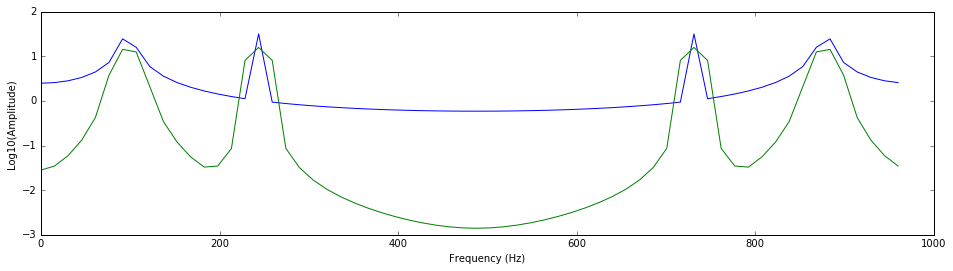

In [89]:
#Write your code for plotting the FFT of the harmonic sound here

def plot_log_magnitude_spectrum(signal1, signal2, sr, figsize=(16,4)):
    f_analysis = sr/signal1.size
    max = f_analysis * signal1.size
    f = np.linspace(0, max, signal1.size)
    plt.figure(figsize=figsize)
    plt.plot(f, np.log10(np.abs(fft(signal1))))
    plt.plot(f, np.log10(np.abs(fft(signal2))))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Log10(Amplitude)')

x = make_sinewave(100., 2., 1000) + make_sinewave(250., 2., 1000)

unwindowed = x[:64]
hann_windowed = np.multiply(sp.signal.hann(64), unwindowed)

plot_log_magnitude_spectrum(unwindowed, hann_windowed, 1000)







#### 11. (one point)  Now, do everything exactly like you did in question 10....except increase the number of points in your FFT by taking  a 256 point FFT of this 64-point windowed sample (there is an optional parameter in scipy's fft that lets you specify how many points the FFT has). When you calculate a FFT with more points than are in the signal, zeros are added to the input signal and interpolation is performed on the output signal. In general, zero-padding in the time domain is equivalent to creating new analysis bins in between original bins in the frequency domain. This often gives us a more accurate view of the frequency content in the signal. What do you see that you didn't see before? 

You can read more about the effect of zero-padding on the frequency-domain representation in the follwing pages:

http://www.dsprelated.com/freebooks/sasp/Zero_Padding_Time_Domain.html

http://dspguru.com/dsp/howtos/how-to-interpolate-in-time-domain-by-zero-padding-in-frequency-domain



your answer goes here.


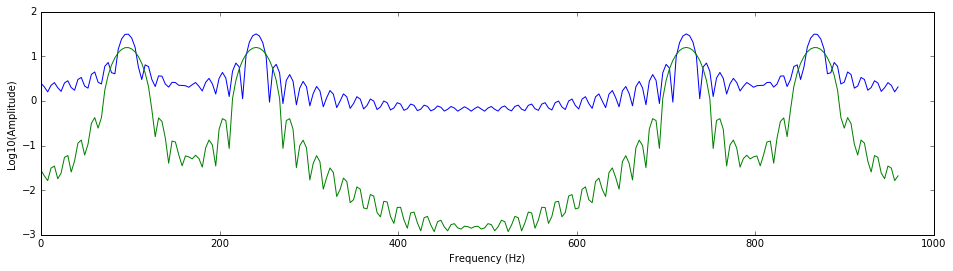

In [94]:
def plot_log_magnitude_spectrum(signal1, signal2, sr, figsize=(16,4)):
    f_analysis = sr/signal1.size
    max = f_analysis * signal1.size
    f = np.linspace(0, max, 256)
    plt.figure(figsize=figsize)
    plt.plot(f, np.log10(np.abs(fft(signal1, 256))))
    plt.plot(f, np.log10(np.abs(fft(signal2, 256))))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Log10(Amplitude)')

x = make_sinewave(100., 2., 1000) + make_sinewave(250., 2., 1000)

unwindowed = x[:64]
hann_windowed = np.multiply(sp.signal.hann(64), unwindowed)

plot_log_magnitude_spectrum(unwindowed, hann_windowed, 1000)

#### 12. (one point) What is the pitch (in Hz) of the lowest note played by a well-tuned piano using equal temperment tuned at A440? What is the pitch (in Hz) of the highest note? Now, given these numbers, assume you're recording at 44100 Hz (CD quality audio). Give a window length (in samples) so that the spacing between frequency bins (and therefore the frequency of the lowest component you can represent) is low enough to capture the lowest note on the piano. 

The lowest note on a piano is the A0, which has a pitch of 27.5Hz (440/2/2/2/2). The highest note is the C8, which has a pitch of 4186Hz (523.25*2*2*2). The fundamental frequency of analysis is 27.5Hz, so 44100/27.5 = ~1603 samples in my window. 

#### 13. (one point) The case of the missing fundamental is where a sound seems to have a pitch at frequency F0, but has no energy at this frequency.  Instead all the frequency is at integer multiples of F0. Build an audio example that illustrates the case of the missing fundamental: First play a harmonic sound with 10 harmonics (including F0).  Let's make it the C one octave below Middle C on the piano: 131 Hz. Then, successively remove each harmonic, starting from the lowest, to the highest (F0, then F1....etc). How many harmonics had to disappear before it sounded like the pitch changed?

3 harmonics had to disappear before it sounded like the pitch changed. 

In [14]:
# your code to make the missing fundamental illustration goes here.
f0 = make_sinewave(131., 10., 44100)
f1 = make_sinewave(262., 10., 44100)
f2 = make_sinewave(393., 10., 44100)
f3 = make_sinewave(524., 10., 44100)
f4 = make_sinewave(655., 10., 44100)
f5 = make_sinewave(786., 10., 44100)
f6 = make_sinewave(917., 10., 44100)
f7 = make_sinewave(1048., 10., 44100)
f8 = make_sinewave(1179., 10., 44100)
f9 = make_sinewave(1310., 10., 44100)

all_f = f0 + f1 + f2 + f3 + f4 + f5 + f6 + f7 + f8 + f9
all_f[43100:] = 0
remove_f0 = f1 + f2 + f3 + f4 + f5 + f6 + f7 + f8 + f9
remove_f0[87200:] = 0
remove_f0[:44100] = 0
remove_f1 = f2 + f3 + f4 + f5 + f6 + f7 + f8 + f9
remove_f1[:88200] = 0
remove_f1[131300:] = 0
remove_f2 = f3 + f4 + f5 + f6 + f7 + f8 + f9
remove_f2[:132300] = 0
remove_f2[175400:] = 0
remove_f3 = f4 + f5 + f6 + f7 + f8 + f9
remove_f3[:176400] = 0
remove_f3[219500:] = 0
remove_f4 = f5 + f6 + f7 + f8 + f9
remove_f4[:220500] = 0
remove_f4[263600:] = 0
remove_f5 = f6 + f7 + f8 + f9
remove_f5[:264600] = 0
remove_f5[307700:] = 0
remove_f6 = f7 + f8 + f9
remove_f6[:308700] = 0
remove_f6[351800:] = 0
remove_f7 = f8 + f9
remove_f7[:352800] = 0
remove_f7[395900:] = 0
remove_f8 = f9
remove_f8[:396900] = 0
remove_f8[440000:] = 0


Audio(all_f + remove_f0 + remove_f1 + remove_f2 
      + remove_f3 + remove_f4 + remove_f5 + remove_f6 + remove_f7 + remove_f8, rate=44100)


#### 14. (one point) Masking is where one sine wave makes a softer sine wave of nearby frequency inaudible. In class, you learned that our frequency sensitivity is related to the log of the frequency. This means that a lower tone will mask a broader frequency range above it than it does below it. We're going to explore that in this problem.  Make a sine wave at 1000 Hz.  Now, make a 2nd sine wave that is 30 dB softer and 50 Hz lower. Play them simultaneusly. Can you hear both? Now repeatedly lower the frequency of the softer sine wave by 50 Hz. At what frequency does it become really obvious that there are two sine waves?  Now try it the other direction.  Make the softer tone at 1050 Hz and vary it upward by 50 Hz each time. Now at what frequency does the softer tone become obvious? By the way....do this experiment with decent headphones in a quiet room. Don't use your laptop speakers in a noisy place.

Going below the frequency, it becomes obvious when the softer sine wave is at about 850Hz, or 150Hz below the louder sine wave's frequency. Going above the frequency, it becomes obvious when the softer sine wave is at about 1300Hz, or 300Hz above the louder sine wave's frequency, confirming that a lower tone will mask a broader frequency range above it than it does below it. 

In [21]:
# your code to illustrate masking goes here

y = 31.7 * make_sinewave(1000., 3., 44100)
print "31.7 coefficient makes the volume louder by " + str(rms_db(y, .7071)) + " dB"

#x = make_sinewave(950., 3., 44100)
#x = make_sinewave(900., 3., 44100)
#x = make_sinewave(850., 3., 44100) maybe here
#x = make_sinewave(800., 3., 44100)
#x = make_sinewave(750., 3., 44100)

#x = make_sinewave(1050., 3., 44100)
#x = make_sinewave(1100., 3., 44100)
#x = make_sinewave(1150., 3., 44100)
#x = make_sinewave(1200., 3., 44100)
#x = make_sinewave(1250., 3., 44100)
#x = make_sinewave(1300., 3., 44100) maybe here
#x = make_sinewave(1350., 3., 44100)
x = make_sinewave(1400., 3., 44100)

Audio(x+y, rate=44100)






31.7 coefficient makes the volume louder by 30.0212685428 dB


#### 15. (one point) Explain, in your own words, what the cochlea does and how it does it.

The cochlea transforms mechanical vibrations into neural impulses that communicate sound frequencies to the brain. The main mechanism for this is the basilar membrane and its varying widths. Basically, when the ossicles vibrate the oval window of the cochlea, it sends these vibrations through the fluid in the cochlea. These vibrations themselves encode the frequencies of the sound that came into the ear, essentially breaking a sound down into a collection of individual sinewaves. Each point on the basilar membrane has a specific resonant frequency that makes it move, so when that frequency comes across in the vibration, that part of the basilar membrane moves up and down. That motion of that section on the basilar membrane causes hair cells to move and send neural impulses to the brain. The brain now knows where on the basilar membrane the motion occurred and through extra auditory processing can translate that information back into a sound that we perceive. 